# Stroop test Analysis

**Task 1**: Identify the independent and dependent variables

independent variable: the respective condition of the stroop task (congruent and incongruent words condition, respectively)

dependent variable: time it takes to name the ink colors in equally-sized lists

**Task 2** What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

H0 (Null Hypothesis): There is either no difference in time it takes to name the ink colors between the congruent and incongruent test setup, or it takes less time in the incongruent setup. **µ(incongruent setup) ≤ µ(congruent setup)**

H1 (Alternative Hypothesis): It takes more time to name the ink colors in the incongruent setup. 
**µ(incongruent setup) > µ(congruent setup)**

I assume the test results, and thus the alternative hypothesis, to be directional, because the incongruent setup requires to perform two tasks (read the word followed by identifying the correct color) in contrast to the congruent setup, which requires only one task (read the word). Thus, it is consequent that performing two tasks will take more time.

Based on the posed hypothesis, I will perform a dependent t-test, because two conditions on the same subjects are being tested. Moreover, it will be a one-tailed t-test, since the hypothesis to be tested is directional.  


**Task 3** Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

summary for the congruent data set: mean= 14.05, median= 14.36, standard deviation= 3.56, IQR= 11.9-16.2 min

summary for the incongruent data set: mean= 22.02, median= 21.02, standard deviation= 4.8, IQR= 18.72-24.05 min



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
stroop_data=pd.read_csv("stroopdata.csv")

In [327]:
stroop_data.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [4]:
def descriptive_stat():
    mean_cong=round(np.mean(stroop_data["Congruent"]),2)
    median_cong=round(np.median(stroop_data["Congruent"]),2)
    mean_incong=round(np.mean(stroop_data["Incongruent"]),2)
    median_incong=round(np.median(stroop_data["Incongruent"]),2)
    
    std_cong=round(np.std(stroop_data["Congruent"],ddof=1),2)
    std_incong=round(np.std(stroop_data["Incongruent"],ddof=1),2)
    print("summary for the congruent data set: mean= " +str(mean_cong) + " median= "+str(median_cong) +" standard deviation= "+ str(std_cong) +
         "\nsummary for the incongruent data set: mean= " +str(mean_incong) + " median= "+str(median_incong) +" standard deviation= "+ str(std_incong))
    
descriptive_stat()    

summary for the congruent data set: mean= 14.05 median= 14.36 standard deviation= 3.56
summary for the incongruent data set: mean= 22.02 median= 21.02 standard deviation= 4.8


In [257]:
def IQR():
    cong_first_pr=round(np.percentile(stroop_data["Congruent"],25),2)
    cong_third_pr=round(np.percentile(stroop_data["Congruent"],75),2)
    
    incong_first_pr=round(np.percentile(stroop_data["Incongruent"],25),2)
    incong_third_pr=round(np.percentile(stroop_data["Incongruent"],75),2)
    
    print("IQR for the congruent set is between "+str(cong_first_pr)+" min" +" and "+str(cong_third_pr)+ " min"
         + "\nIQR for the incongruent set is between " +str(incong_first_pr)+" min" +" and "+str(incong_third_pr)+ " min")
IQR()

IQR for the congruent set is between 11.9 min and 16.2 min
IQR for the incongruent set is between 18.72 min and 24.05 min


**Task 4** Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

The incongruent data sets show a slightly positive skewness. This data set exhibits two modes (17-18 min and 20-21 min). Moreover there is an offset between the mode, mean (22.02) and median (21.02) and two data points (>34 min) show tendency of outliers. As such, the interquartile range (18.72-24.05 min) is a better metric to describe the distribution (see also the boxplot).
the congruent data set is (slightly) more evenly distributed around the mean (14.05) and median (14.36).
Overall, the congruent data set shows that the majority of subjects required between 11.9 min and 16.2 min (IQR) to finish the stroop test. This is contrasted by longer time to finish the stroop test with the incongruent setup, with the majority of subjects requiring between 18.72 min and 24.05 min (IQR).




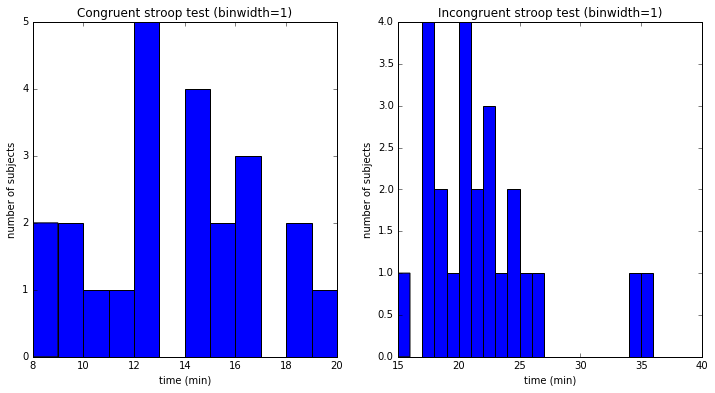

In [337]:
%matplotlib inline
def hist():
    plt.figure(1, figsize=(12,6)) 
    
    bins_cong=range(int(stroop_data["Congruent"].min()),21,1)
    bins_incong=range(int(stroop_data["Incongruent"].min()),37,1)
    
    plt.subplot(1,2,1)
    plt.hist(stroop_data["Congruent"], bins=bins_cong)
    plt.xlabel("time (min)")
    plt.ylabel("number of subjects")
    plt.title("Congruent stroop test (binwidth=1)")
    
    plt.subplot(1,2,2)
    plt.hist(stroop_data["Incongruent"], bins=bins_incong)
    plt.xlabel("time (min)")
    plt.ylabel("number of subjects")
    plt.title("Incongruent stroop test (binwidth=1)")
    
hist()      

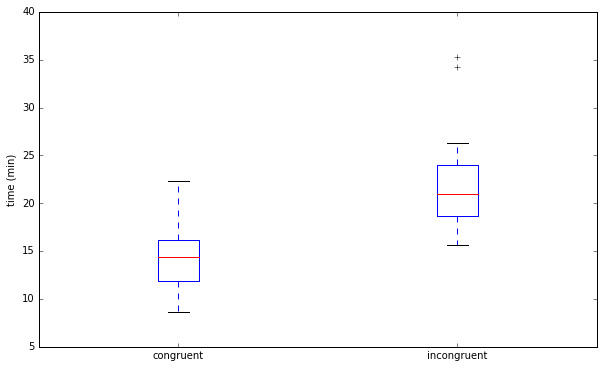

In [328]:
def boxplot():
    plt.figure(1, figsize=(10,6)) 
    
    
    plt.boxplot((stroop_data["Congruent"],stroop_data["Incongruent"]), labels =("congruent","incongruent"))
    plt.ylabel("time (min)")
    
boxplot()    

**Task 5** Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

**Parameters for the t-test**

confidence level = 95%

critical statistic value (t-critical) = 1.717 (alpha level = 0.05, degrees of freedom = 23)

sample size = 24

**Results report**

There was a significant effect for stroop task conditions , **t(23) = 8.02, p < .05 (http://graphpad.com/quickcalcs/pValue1/), one tailed**, with subjects performing the task in the "incongruent setup" requiring longer time to finish, **confidence interval on the mean difference between the stroop task in congruent condition and the stroop task in incongruent condition; 95% CI = (5.91-10.02 min) **.
Based on the t-test result, I reject the null hypothesis in favour of the alternative hypothesis.

(The results match up with prior expectations)

 

In [322]:
def stat_test():
    """
    SD_diff:   standard deviation of the difference between the two sample conditions (congruent vs. incongruent) with n-1 degrees of freedom
    SE_diff:   standard error of the sampling distribution 
    t_stat:    t-statistic
    mean_diff: mean difference between the two sample conditions
    CI_LL:     lower limit of the 95% confidence interval
    CI_UL:     upper limit of the 95% confidence interval
    """
    SD_diff=np.std((stroop_data["Incongruent"]-stroop_data["Congruent"]), ddof=1)
    SE_diff=SD_diff/np.sqrt(24)
    t_stat=(np.mean(stroop_data["Incongruent"])-np.mean(stroop_data["Congruent"]))/SE_diff
    mean_diff=np.mean(stroop_data["Incongruent"]-stroop_data["Congruent"])
    CI_LL=np.mean(stroop_data["Incongruent"]-stroop_data["Congruent"])-(2.069*SE_diff)
    CI_UL=np.mean(stroop_data["Incongruent"]-stroop_data["Congruent"])+(2.069*SE_diff)
    
    print("t-statistic = "+str(round(t_stat,2))+"\n95% confidence interval = "+"("+str(round(CI_LL,2))+"-"+str(round(CI_UL,2))+")")     
    
stat_test()

t-statistic = 8.02
95% confidence interval = (5.91-10.02)


**Task 6** Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

The stroop effect describes the interference of automatic processes (e.g. reading) on non-automatic processes (e.g. naming objects colors). It shows that conscious control of automatic processes (here explicitly not reading the word) can be difficult (requires concentration), and as such the execution of these automatic processes will eventually influence (in terms of reaction time and accuracy) other tasks the brain is trying to plan and execute in parallel. 

In this context, basically every task that a person was conditioned to perform in a particular mode of execution is prone to the stroop effect. For instance, controlling the computer mouse according to different setups of the mouse x/y axes (left/right and up/down movement).
test:
1. start in the middle of the computer display
2. randomly pop up an object somewhere on the display
3. move the mouse to match the objects' position
4. measure the time it takes to match 10 object positions

perform the test with the subjects' favourable mouse x/y axes configuration (congruent) versus mouse x/y axes inverted (incongruent).
compare the time it takes to finish the test for each condition.